In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import glob
import os
import matplotlib.patches as mpatches
import seaborn as sns

In [4]:
error_df = pd.read_csv('error_results.csv').drop('Unnamed: 0',axis=1)
error_df = error_df[~error_df['emulator'].isin(['tasmax_perfect_ACCESS-CM2_moved_shuffle','pr_perfect_ACCESS-CM2_moved_shuffle'])]

# add column indicating if result is 'in' or 'out' of sample
samplings = []
n_training = []
for i in error_df.index:
    row = error_df.loc[i]
    gcm = row['GCM']
    emulator = row['emulator']
    split_emulator = emulator.split('_')
    if gcm in split_emulator:
        samplings.append('in')
    else:
        samplings.append('out')

    if emulator in one_GCM_emulators:
        n_training.append('1')
    elif emulator in two_GCM_emulators:
        n_training.append('2')
    elif emulator in five_GCM_emulators:
        n_training.append('5')
    else:
        print(emulator)

error_df['sample'] = samplings
error_df['n_training_GCMs'] = n_training

In [3]:
one_GCM_emulators = ['tasmax_perfect_ACCESS-CM2_batch_16',
                      'tasmax_perfect_EC-Earth3_batch_16',
                      'tasmax_perfect_NorESM2-MM_batch_16',
                      'pr_perfect_ACCESS-CM2_batch_16',
                      'pr_perfect_EC-Earth3_batch_16',
                      'pr_perfect_NorESM2-MM_batch_16']

two_GCM_emulators = ['tasmax_perfect_ACCESS-CM2_EC-Earth3_batch_8',
                      'tasmax_perfect_ACCESS-CM2_NorESM2-MM_batch_8',
                      'tasmax_perfect_EC-Earth3_NorESM2-MM_batch_8',
                      'pr_perfect_ACCESS-CM2_EC-Earth3_batch_8',
                      'pr_perfect_ACCESS-CM2_NorESM2-MM_batch_8',
                      'pr_perfect_EC-Earth3_NorESM2-MM_batch_8']

five_GCM_emulators = ['NIWA-REMS_tasmax_v280125','NIWA-REMS_pr_v280125']

In [5]:
'''
create rank dataframe
'''

df = error_df[~error_df.emulator.isin(['NIWA-REMS_pr_v280125','NIWA-REMS_tasmax_v280125'])]

rank_dfs = {}
for var in ['tasmax','pr']:
    var_df = error_df[error_df['var']==var]
    var_df['rank'] = var_df['land'].rank()

    rank_dfs[var]=var_df

/tmp/ipykernel_27783/3430400033.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var_df['rank'] = var_df['land'].rank()
/tmp/ipykernel_27783/3430400033.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var_df['rank'] = var_df['land'].rank()


In [112]:
rank_df.sort_values('land')

,GCM,emulator,framework,base period,future period,error period,var,metric,error type,whole region,land,ocean,sample,n_training_GCMs,rank
528,NorESM2-MM,NIWA-REMS_pr_v280125,perfect,1985_2004,2080_2099,CC signal,pr,annual_mean,MAE,5.041568,2.588293,5.254987,out,5,1.0
504,NorESM2-MM,pr_perfect_EC-Earth3_NorESM2-MM_batch_8,perfect,1985_2004,2080_2099,CC signal,pr,annual_mean,MAE,5.667849,2.761283,5.920701,in,2,2.0
480,NorESM2-MM,pr_perfect_ACCESS-CM2_NorESM2-MM_batch_8,perfect,1985_2004,2080_2099,CC signal,pr,annual_mean,MAE,4.496123,2.778982,4.645502,in,2,3.0
432,NorESM2-MM,pr_perfect_NorESM2-MM_batch_16,perfect,1985_2004,2080_2099,CC signal,pr,annual_mean,MAE,3.906644,2.803310,4.002627,in,1,4.0
408,NorESM2-MM,pr_perfect_EC-Earth3_batch_16,perfect,1985_2004,2080_2099,CC signal,pr,annual_mean,MAE,4.613879,2.867042,4.765842,out,1,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,NorESM2-MM,pr_perfect_ACCESS-CM2_batch_16,imperfect,1985_2004,2080_2099,1985_2004,pr,rx1d,MAPE,19.687938,21.489242,19.531236,out,1,500.0
165,ACCESS-CM2,pr_perfect_NorESM2-MM_batch_16,imperfect,1985_2004,2080_2099,1985_2004,pr,JJA_mean,MAPE,33.604185,22.060888,34.608375,out,1,501.0
127,ACCESS-CM2,pr_perfect_EC-Earth3_batch_16,imperfect,1985_2004,2080_2099,CC signal,pr,rx1d,MAE,23.118323,23.504910,23.084692,out,1,502.0
151,ACCESS-CM2,pr_perfect_NorESM2-MM_batch_16,imperfect,1985_2004,2080_2099,CC signal,pr,rx1d,MAE,21.495160,23.908379,21.285226,out,1,503.0


In [96]:
tasmax_tally = {'ACCESS-CM2':0,'NorESM2-MM':0,'EC-Earth3':0}

rank_df = rank_dfs['tasmax']
for gcm in rank_df.GCM.unique():

    for i in rank_df.index:
        rank = rank_df.loc[i]['rank']
        training_gcms = rank_df.loc[i]['emulator'].split('_')

        if gcm in training_gcms:
            tasmax_tally[gcm] += rank

pr_tally = {'ACCESS-CM2':0,'NorESM2-MM':0,'EC-Earth3':0}

rank_df = rank_dfs['pr']
for gcm in rank_df.GCM.unique():

    for i in rank_df.index:
        rank = rank_df.loc[i]['rank']
        training_gcms = rank_df.loc[i]['emulator'].split('_')

        if gcm in training_gcms:
            pr_tally[gcm] += rank
        

In [117]:
tasmax_tally

{'ACCESS-CM2': 12901.0, 'NorESM2-MM': 14902.0, 'EC-Earth3': 13461.0}

{'ACCESS-CM2': 12901.0, 'NorESM2-MM': 14902.0, 'EC-Earth3': 13461.0}
{'ACCESS-CM2': 51556.0, 'NorESM2-MM': 54856.0, 'EC-Earth3': 53256.0}


<BarContainer object of 3 artists>

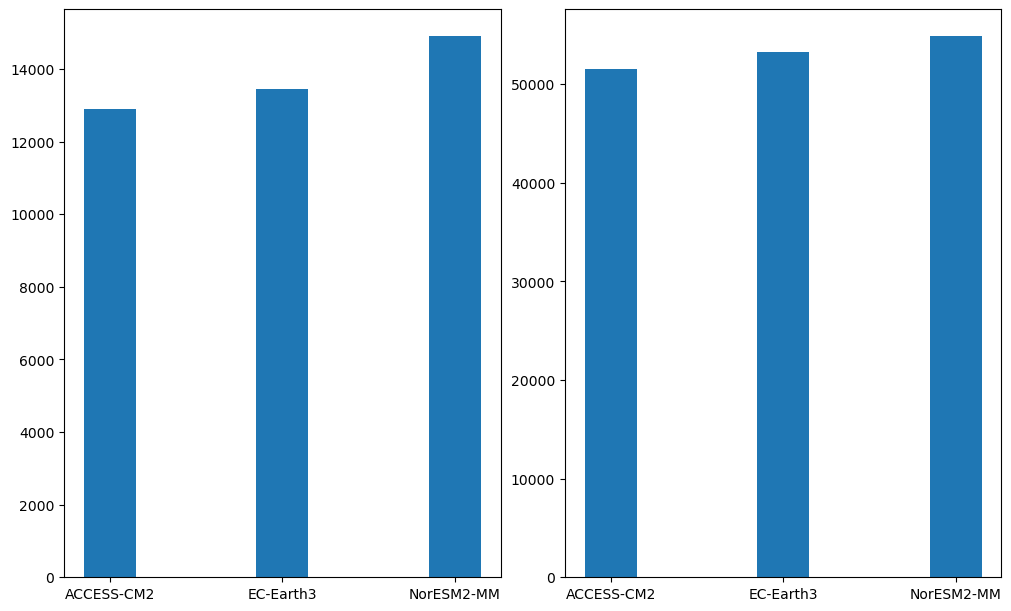

In [121]:
print(tasmax_tally)
print(pr_tally)



'''
fig,axs = plt.subplots(1,2,figsize=(10,6),layout='constrained')

axs[0].bar(['ACCESS-CM2','EC-Earth3','NorESM2-MM'],[tasmax_tally[key] for key in ['ACCESS-CM2','EC-Earth3','NorESM2-MM']],width=0.3)
axs[1].bar(['ACCESS-CM2','EC-Earth3','NorESM2-MM'],[pr_tally[key] for key in ['ACCESS-CM2','EC-Earth3','NorESM2-MM']],width=0.3)
'''

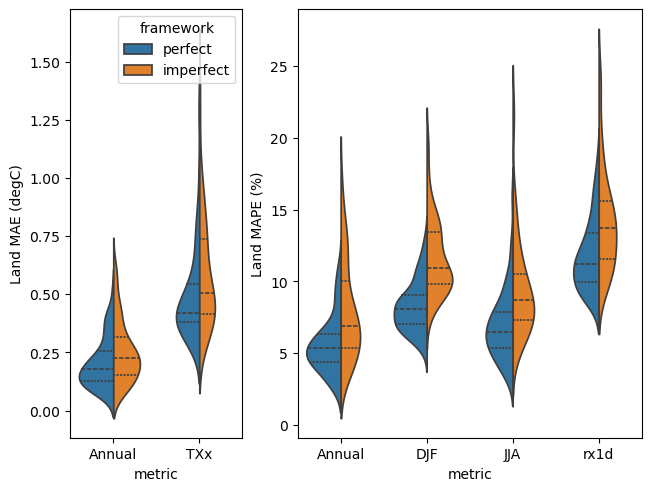

In [6]:
'''
PERFECT VS IMPERFECT
'''

x = 'metric'
y = 'land'
hue = 'framework'

fig,axs = plt.subplots(1, 2, width_ratios=[1,2],layout='constrained')

order_dict = {'tasmax':['annual_mean','TXx'],'pr':['annual_mean','DJF_mean','JJA_mean','rx1d']}
label_dict = {'tasmax':['Annual','TXx'],'pr':['Annual','DJF','JJA','rx1d']}
ylabels = {'tasmax':'Land MAE (degC)','pr':'Land MAPE (%)'}
for i,var in enumerate(['tasmax','pr']):

    var_df = error_df[error_df['var']==var]
    
    sns.violinplot(ax=axs[i],data=var_df,x=x,y=y,hue=hue,split=True,inner='quart',order=order_dict[var],\
                   legend='auto' if i == 0 else False,common_norm=True)
    axs[i].set_xticks([i for i in range(len(label_dict[var]))],labels=label_dict[var])

    axs[i].set_ylabel(ylabels[var])
    


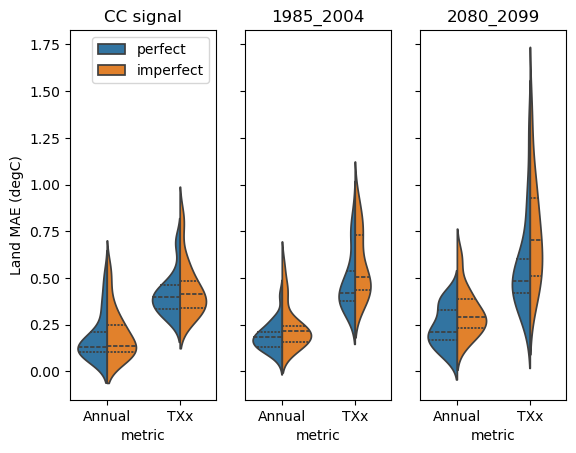

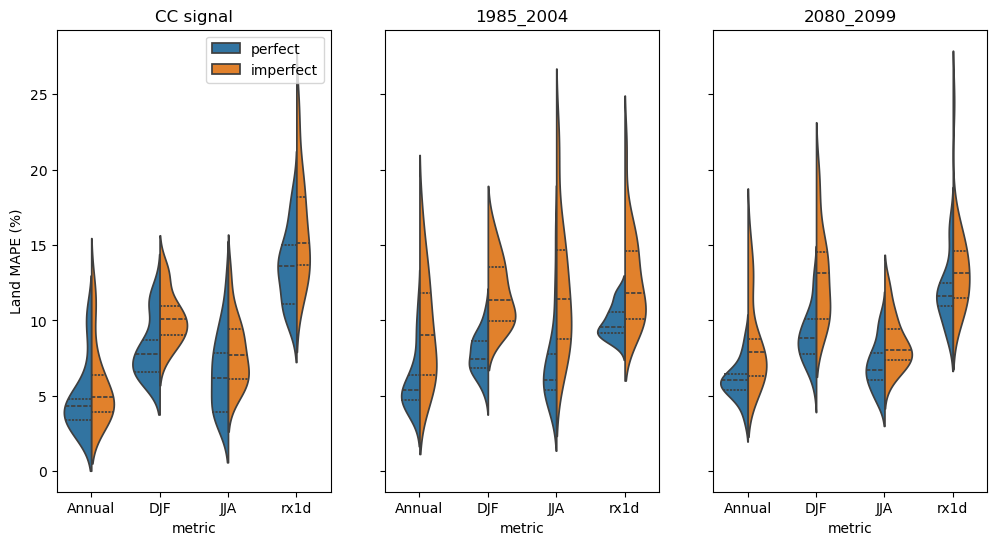

In [56]:
'''
PERFECT VS IMPERFECT
'''
x = 'metric'
y = 'land'
hue = 'framework'

# TEMPERATURE
fig,axs = plt.subplots(1,3,sharex=True,sharey=True)
var_df = error_df[error_df['var']=='tasmax']
for i,period in enumerate(error_df['error period'].unique()):

    period_df = var_df[var_df['error period']==period]
    
    sns.violinplot(ax=axs[i],data=period_df,x=x,y=y,hue=hue,split=True,inner='quart',legend=False if i > 0 else 'auto',order=['annual_mean','TXx'])

    axs[i].set_title(period)
    axs[i].set_xticks([0,1],labels=['Annual','TXx'])
    axs[i].set_ylabel('Land MAE (degC)')

axs[0].legend()


# PRECIPITATION
fig,axs = plt.subplots(1,3,figsize=(12,6),sharex=True,sharey=True)
var_df = error_df[error_df['var']=='pr']
for i,period in enumerate(error_df['error period'].unique()):

    period_df = var_df[var_df['error period']==period]
    
    sns.violinplot(ax=axs[i],data=period_df,x=x,y=y,hue=hue,split=True,inner='quart',legend=False if i > 0 else 'auto',order=['annual_mean','DJF_mean','JJA_mean','rx1d'])
    
    axs[i].set_title(period)
    axs[i].set_xticks([0,1,2,3],labels=['Annual','DJF','JJA','rx1d'])
    axs[i].set_ylabel('Land MAPE (%)')

axs[0].legend()

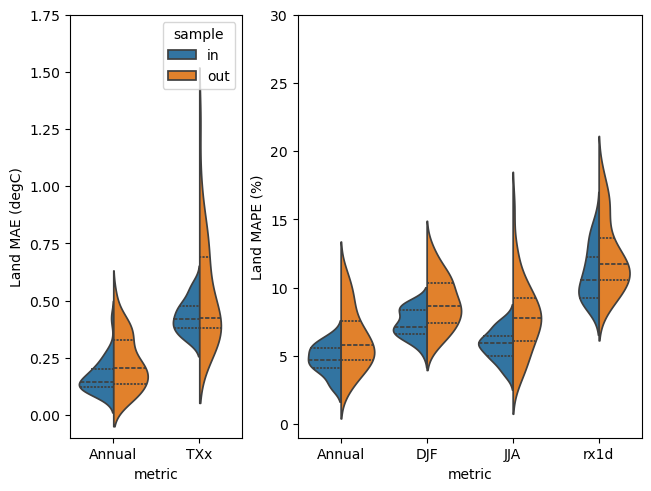

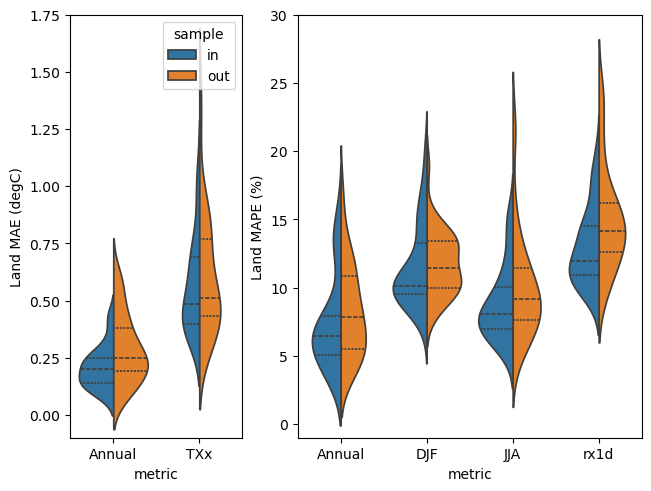

In [8]:
'''
IN vs OUT of sample
'''

for f in ['perfect','imperfect']:

    df = error_df[error_df['framework']==f]
    
    fig,axs = plt.subplots(1, 2, width_ratios=[1,2],layout='constrained')
    
    order_dict = {'tasmax':['annual_mean','TXx'],'pr':['annual_mean','DJF_mean','JJA_mean','rx1d']}
    label_dict = {'tasmax':['Annual','TXx'],'pr':['Annual','DJF','JJA','rx1d']}
    ylabels = {'tasmax':'Land MAE (degC)','pr':'Land MAPE (%)'}
    for i,var in enumerate(['tasmax','pr']):
    
        var_df = df[df['var']==var]
        
        sns.violinplot(ax=axs[i],data=var_df,x='metric',y='land',hue='sample',split=True,inner='quart',order=order_dict[var],\
                       legend='auto' if i == 0 else False,)
        axs[i].set_xticks([i for i in range(len(label_dict[var]))],labels=label_dict[var])
    
        axs[i].set_ylabel(ylabels[var])

        if var == 'tasmax':
            axs[i].set_ylim(-0.1,1.75)

        if var == 'pr':
            axs[i].set_ylim(-1,30)
    


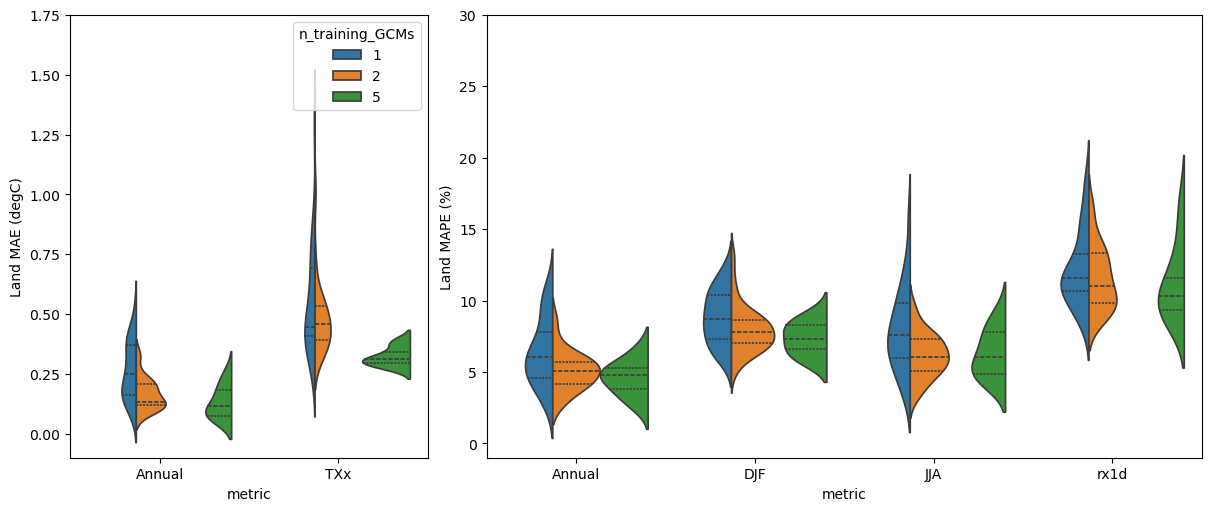

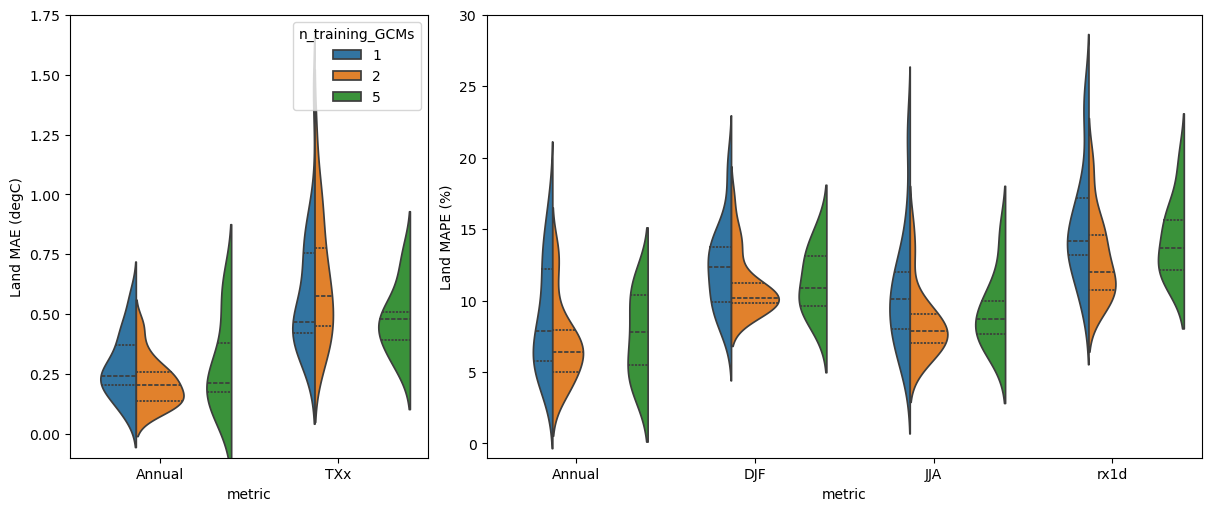

In [10]:
'''
Number of training GCMS
'''

x = 'metric'
y = 'land'
hue = 'n_training_GCMs'
split = True

for f in ['perfect','imperfect']:

    df = error_df[error_df['framework']==f]
    
    fig,axs = plt.subplots(1, 2, figsize=(12,5),width_ratios=[1,2],layout='constrained')
    
    order_dict = {'tasmax':['annual_mean','TXx'],'pr':['annual_mean','DJF_mean','JJA_mean','rx1d']}
    label_dict = {'tasmax':['Annual','TXx'],'pr':['Annual','DJF','JJA','rx1d']}
    ylabels = {'tasmax':'Land MAE (degC)','pr':'Land MAPE (%)'}
    for i,var in enumerate(['tasmax','pr']):
    
        var_df = df[df['var']==var]
    
        sns.violinplot(ax=axs[i],data=var_df,x=x,y=y,hue=hue,split=split,inner='quart',order=order_dict[var],\
                       legend='auto' if i == 0 else False,common_norm=True)
    
        axs[i].set_xticks([i for i in range(len(label_dict[var]))],labels=label_dict[var])
    
        axs[i].set_ylabel(ylabels[var])

        if var == 'tasmax':
            axs[i].set_ylim(-0.1,1.75)

        if var == 'pr':
            axs[i].set_ylim(-1,30)
    
